In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Load the dataset into the tool.

In [3]:

df=pd.read_csv('Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


# 3. Perform Below Visualizations.
# 1. Univariate Analysis


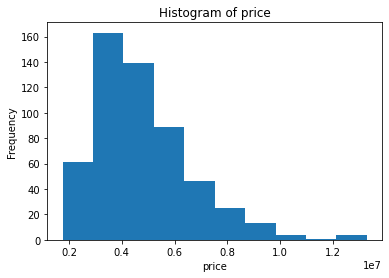

In [6]:
#3. Perform Below Visualizations.
#1. Univariate Analysis
# Histogram
plt.hist(df['price'], bins=10)
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

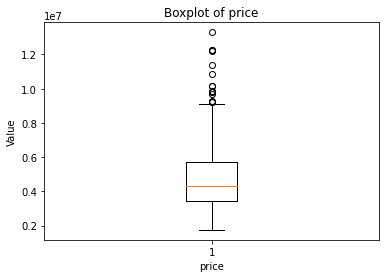

In [7]:
# Boxplot
plt.boxplot(df['price'])
plt.title('Boxplot of price')
plt.xlabel('price')
plt.ylabel('Value')
plt.show()

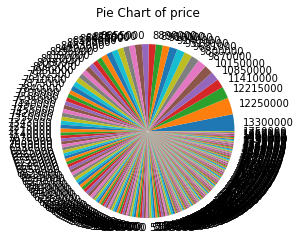

In [9]:
#Pie Chart
plt.pie(df['price'].value_counts(), labels=df['price'].unique())
plt.title('Pie Chart of price')
plt.show()

# Bivariate analysis

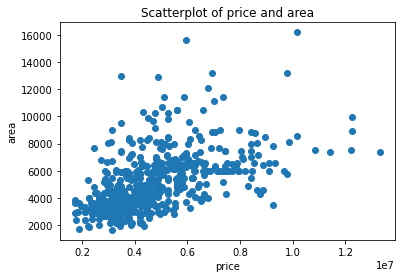

In [10]:
# Bivariate analysis
# Scatterplot
plt.scatter(df['price'], df['area'])
plt.title('Scatterplot of price and area')
plt.xlabel('price')
plt.ylabel('area')
plt.show()

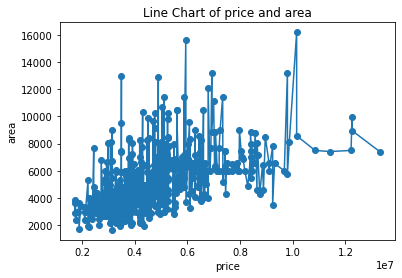

In [11]:
# Line chart
plt.plot(df['price'], df['area'], 'o-')
plt.title('Line Chart of price and area')
plt.xlabel('price')
plt.ylabel('area')
plt.show()

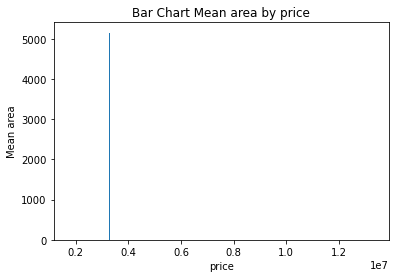

In [18]:
# Bar chart
plt.bar(df['price'].unique(), df['area'].mean(), align='center')
plt.title('Bar Chart Mean area by price')
plt.xlabel('price')
plt.ylabel('Mean area')
plt.show()

#  Multivariate analysis

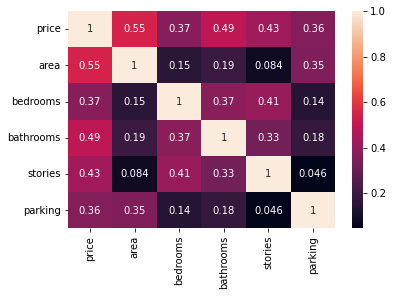

In [19]:
# Multivariate analysis
# Heatmap
df['price'] = df['price'].astype('category').cat.codes
sns.heatmap(df.corr(), annot=True)
plt.show()

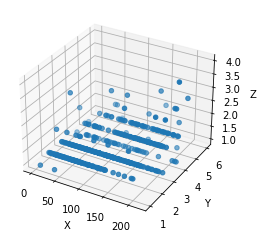

In [20]:
# Multivariate analysis
# 3D scatterplot
from mpl_toolkits.mplot3d import Axes3D
x = df['price']
y = df['bedrooms']
z = df['bathrooms']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


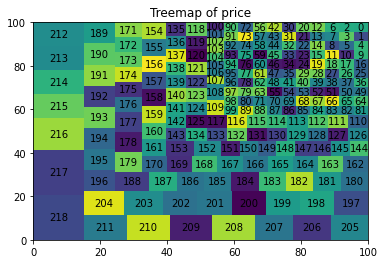

In [21]:
# Treemap
import squarify
plt.figure()
squarify.plot(df['price'].value_counts(), label=df['price'].unique())
plt.title('Treemap of price')
plt.show()

# 4. Perform descriptive statistics on the dataset.

In [22]:
#4. Perform descriptive statistics on the dataset.
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,95.728440,5150.541284,2.965138,1.286239,1.805505,0.693578
std,56.256108,2170.141023,0.738064,0.502470,0.867492,0.861586
min,0.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,51.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,87.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,137.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,218.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int16 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int16(1), int64(5), object(6)
memory usage: 48.0+ KB


# 5. Check for Missing values and deal with them

In [24]:
#5. Check for Missing values and deal with them
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

# 6.Find the outliers and replace the outliers

In [25]:
#6. Find the outliers and replace them outliers
target_column = 'price'
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1

In [26]:
IQR

86.0

In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
lower_bound

-78.0

In [29]:
upper_bound

266.0

In [30]:
outliers = df[(df[target_column] < lower_bound) | (df[target_column] > upper_bound)]

In [31]:
median_value = df[target_column].median()
df.loc[(df[target_column] < lower_bound) | (df[target_column] > upper_bound), target_column] = median_value

In [32]:
median_value

87.0

In [33]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,218,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,217,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,217,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,216,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,215,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,0,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,0,2910,3,1,1,no,no,no,no,no,0,furnished


In [34]:
print(df)

     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0      218  7420         4          2        3      yes        no       no   
1      217  8960         4          4        4      yes        no       no   
2      217  9960         3          2        2      yes        no      yes   
3      216  7500         4          2        2      yes        no      yes   
4      215  7420         4          1        2      yes       yes      yes   
..     ...   ...       ...        ...      ...      ...       ...      ...   
540      2  3000         2          1        1      yes        no      yes   
541      1  2400         3          1        1       no        no       no   
542      0  3620         2          1        1      yes        no       no   
543      0  2910         3          1        1       no        no       no   
544      0  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking furnishingstatus  

# 7. Check for Categorical columns and perform encoding.

In [35]:
#7. Check for Categorical columns and perform encoding.
from sklearn.preprocessing import LabelEncoder
df.dtypes

price                int16
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [36]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [38]:
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [37]:
print(df_encoded)

     price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0      218  7420         4          2        3        2            0   
1      217  8960         4          4        4        3            0   
2      217  9960         3          2        2        2            0   
3      216  7500         4          2        2        3            0   
4      215  7420         4          1        2        2            0   
..     ...   ...       ...        ...      ...      ...          ...   
540      2  3000         2          1        1        2            0   
541      1  2400         3          1        1        0            1   
542      0  3620         2          1        1        0            0   
543      0  2910         3          1        1        0            1   
544      0  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0               1             1              0            

# 8. Split the data into dependent and independent variables.

In [39]:
#8. Split the data into dependent and independent variables. 
dependent_variable = 'price'
independent_variables = df.drop(dependent_variable, axis=1)
dependent_variable = df[dependent_variable]

In [41]:
print(dependent_variable)

0      218
1      217
2      217
3      216
4      215
      ... 
540      2
541      1
542      0
543      0
544      0
Name: price, Length: 545, dtype: int16


In [43]:
independent_variables

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,furnished


In [45]:
print(independent_variables)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking furnishingstatus  
0                no             yes        2        furnished  
1                no

# 9. Scale the independent variables

In [49]:
#9. Scale the independent variables
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['price', 'bedrooms', 'bathrooms', 'area', 'stories', 'parking']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [50]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,2.175477,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,furnished
1,2.157685,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,furnished
2,2.157685,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,semi-furnished
3,2.139893,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,furnished
4,2.122101,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.667633,-0.991879,-1.308863,-0.570187,-0.929397,yes,no,yes,no,no,1.517692,unfurnished
541,-1.685425,-1.268613,0.047278,-0.570187,-0.929397,no,no,no,no,no,-0.805741,semi-furnished
542,-1.703217,-0.705921,-1.308863,-0.570187,-0.929397,yes,no,no,no,no,-0.805741,unfurnished
543,-1.703217,-1.033389,0.047278,-0.570187,-0.929397,no,no,no,no,no,-0.805741,furnished


In [51]:
print(df)

        price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0    2.175477  1.046726  1.403419   1.421812  1.378217      yes        no   
1    2.157685  1.757010  1.403419   5.405809  2.532024      yes        no   
2    2.157685  2.218232  0.047278   1.421812  0.224410      yes        no   
3    2.139893  1.083624  1.403419   1.421812  0.224410      yes        no   
4    2.122101  1.046726  1.403419  -0.570187  0.224410      yes       yes   
..        ...       ...       ...        ...       ...      ...       ...   
540 -1.667633 -0.991879 -1.308863  -0.570187 -0.929397      yes        no   
541 -1.685425 -1.268613  0.047278  -0.570187 -0.929397       no        no   
542 -1.703217 -0.705921 -1.308863  -0.570187 -0.929397      yes        no   
543 -1.703217 -1.033389  0.047278  -0.570187 -0.929397       no        no   
544 -1.703217 -0.599839  0.047278  -0.570187  0.224410      yes        no   

    basement hotwaterheating airconditioning   parking furnishingstatus  
0

# 10.Split the data into training and testing

In [121]:
#10.Split the data into training and testing
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)  
y = df['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [122]:
X_train


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
167,-0.253922,-1.308863,1.421812,-0.929397,1,0,0,0,1,1.517692,1
368,0.225750,-1.308863,-0.570187,-0.929397,0,0,0,0,0,-0.805741,1
301,-0.752043,0.047278,-0.570187,0.224410,1,0,0,0,0,-0.805741,1
527,-1.528742,-1.308863,-0.570187,-0.929397,0,0,1,0,0,-0.805741,1
382,-0.922695,0.047278,-0.570187,0.224410,1,0,1,0,0,-0.805741,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0.391790,1.403419,1.421812,2.532024,1,0,0,0,1,-0.805741,2
106,0.138117,1.403419,1.421812,-0.929397,1,0,1,0,1,-0.805741,1
270,-0.300045,0.047278,1.421812,1.378217,1,0,0,1,0,0.355976,0
435,-0.512207,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,2


In [123]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
316,0.345668,1.403419,1.421812,0.224410,0,0,1,0,0,0.355976,2
77,0.622401,0.047278,1.421812,1.378217,1,0,0,0,1,-0.805741,0
360,-0.512207,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,1
90,-0.069433,0.047278,-0.570187,0.224410,1,0,0,0,1,-0.805741,1
493,-0.549105,0.047278,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0
...,...,...,...,...,...,...,...,...,...,...,...
172,1.498725,0.047278,-0.570187,0.224410,1,1,1,0,1,1.517692,2
124,0.633932,0.047278,1.421812,2.532024,1,0,0,0,0,0.355976,0
388,-0.692084,0.047278,-0.570187,0.224410,1,0,0,0,0,-0.805741,2
521,-0.699002,-1.308863,-0.570187,-0.929397,0,0,0,0,0,-0.805741,2


In [124]:
y_train

167    0.520805
368   -0.635687
301   -0.262051
527   -1.525296
382   -0.706855
         ...   
71     1.285868
106    0.983401
270   -0.155298
435   -0.920362
102    1.001194
Name: price, Length: 408, dtype: float64

In [125]:
y_test

316   -0.386596
77     1.232492
360   -0.600102
90     1.125739
493   -1.276205
         ...   
172    0.503013
124    0.876648
388   -0.742440
521   -1.454127
503   -1.329582
Name: price, Length: 137, dtype: float64

In [126]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [127]:
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])

In [128]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,2.175477,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,0
1,2.157685,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,2.157685,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,2.139893,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,0
4,2.122101,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0


# 11. Build the Model

In [129]:
#11. Build the Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df, df['price'], test_size=0.25)

In [130]:
model.fit(X_train,y_train)

LinearRegression()

# 12. Train the model

In [131]:
#12. Train the model
X_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
473,-1.151660,1.337297,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,2
206,0.253922,0.299545,-1.308863,-0.570187,-0.929397,1,1,1,0,1,-0.805741,1
285,-0.244259,0.691585,0.047278,-0.570187,0.224410,1,1,0,0,0,-0.805741,1
212,0.236130,-0.798165,1.403419,1.421812,0.224410,1,0,1,0,1,1.517692,1
100,1.018986,0.668524,0.047278,1.421812,-0.929397,1,0,1,0,1,-0.805741,2
...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.991530,-0.784329,0.047278,-0.570187,0.224410,1,0,1,0,0,-0.805741,1
42,1.606128,0.613177,0.047278,1.421812,2.532024,1,0,0,0,1,1.517692,2
342,-0.493349,0.923119,0.047278,-0.570187,0.224410,1,0,0,0,1,-0.805741,0
527,-1.525296,-1.528742,-1.308863,-0.570187,-0.929397,0,0,1,0,0,-0.805741,1


In [132]:
y_train

473   -1.151660
206    0.253922
285   -0.244259
212    0.236130
100    1.018986
         ...   
450   -0.991530
42     1.606128
342   -0.493349
527   -1.525296
469   -1.133868
Name: price, Length: 408, dtype: float64

# 13. Test the model

In [133]:
#13. Test the model
score = model.score(X_test, y_test)

In [134]:
X_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
171,0.503013,2.360750,0.047278,-0.570187,-0.929397,1,0,0,0,0,0.355976,1
247,0.022624,1.498725,1.403419,-0.570187,2.532024,1,0,0,0,0,2.679409,2
333,-0.457765,-0.991879,0.047278,-0.570187,0.224410,1,0,0,0,0,-0.805741,1
357,-0.564518,0.820727,1.403419,-0.570187,0.224410,0,0,0,0,0,0.355976,0
105,0.983401,-0.300045,0.047278,-0.570187,2.532024,1,0,0,0,1,-0.805741,2
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.196908,2.467293,0.047278,1.421812,-0.929397,1,0,1,0,1,0.355976,0
494,-1.293997,0.760768,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,2
125,0.858856,4.819529,0.047278,-0.570187,-0.929397,1,0,0,0,1,1.517692,1
377,-0.653479,-1.061062,0.047278,1.421812,0.224410,0,0,1,0,0,-0.805741,2


In [135]:
y_test

171    0.503013
247    0.022624
333   -0.457765
357   -0.564518
105    0.983401
         ...   
82     1.196908
494   -1.293997
125    0.858856
377   -0.653479
393   -0.742440
Name: price, Length: 137, dtype: float64

In [136]:
score

1.0

In [137]:
predictions = model.predict(X_test)

In [138]:
predictions

array([ 0.50301263,  0.02262382, -0.457765  , -0.56451807,  0.98340144,
        1.60612768,  1.30366065, -1.57867223,  1.92638689, -0.47555718,
        0.94781709, -0.84919292, -0.08412925,  0.2005456 , -0.26205104,
        0.50301263,  1.44599808, -0.74243985, -0.92036163, -1.32958173,
        0.93002491, -0.58231025, -0.63568678, -0.0485449 , -1.32958173,
       -1.13386777, -0.84919292, -0.43997282, -0.6178946 ,  2.15768521,
        0.25392213,  1.51716679, -1.25841302,  0.25392213, -0.03075272,
        1.00119362, -0.51114153, -0.99153035,  1.23249194,  1.80184164,
       -0.42218064, -0.03075272, -1.20503648, -0.10192143, -0.99153035,
       -0.6178946 , -0.10192143,  1.23249194, -0.0485449 , -0.38659628,
       -1.20503648, -0.17309015,  1.76625728, -0.56451807, -0.19088232,
        0.16496124, -0.70685549, -1.25841302, -0.97373817,  1.94417907,
       -0.19088232, -0.99153035, -0.65347896,  1.87301035, -0.22646668,
        1.30366065,  0.37846738,  2.03313996,  1.74846511,  0.50

# 14. Measure the performance using Metrics

In [141]:
#14. Measure the performance using Metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
y_pred = model.predict(X_test)

In [142]:
error=y_test-y_pred

In [143]:
error

171    4.440892e-16
247    3.469447e-17
333   -5.551115e-17
357   -4.440892e-16
105    1.110223e-15
           ...     
82     4.440892e-16
494   -2.220446e-16
125    7.771561e-16
377   -8.881784e-16
393   -4.440892e-16
Name: price, Length: 137, dtype: float64

In [144]:
se=error*error

In [145]:
se

171    1.972152e-31
247    1.203706e-33
333    3.081488e-33
357    1.972152e-31
105    1.232595e-30
           ...     
82     1.972152e-31
494    4.930381e-32
125    6.039716e-31
377    7.888609e-31
393    1.972152e-31
Name: price, Length: 137, dtype: float64

In [146]:
mse=np.mean(se)

In [147]:
mse

2.7925977603982354e-31

In [148]:
mse2=mean_squared_error(y_test,y_pred)

In [149]:
mse2

2.7925977603982354e-31

In [150]:
mae=mean_absolute_error(y_test,y_pred)

In [151]:
mae

4.4222786422255463e-16

In [152]:
rmse=np.sqrt(mse2)

In [153]:
rmse

5.284503534295569e-16

In [154]:
r2=r2_score(y_test,y_pred)

In [155]:
r2

1.0